In [434]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

%matplotlib inline

In [435]:
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

In [436]:
def continuous_var_summary( x ):
    
    # freq and missings
    n_total = x.shape[0]
    n_miss = x.isna().sum()
    perc_miss = n_miss * 100 / n_total
    
    # outliers - iqr
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3 - q1
    lc_iqr = q1 - 1.5 * iqr
    uc_iqr = q3 + 1.5 * iqr
    
    
    return pd.Series( [ x.dtype, x.nunique(), n_total, x.count(), n_miss, perc_miss,
                       x.sum(), x.mean(), x.std(), x.var(), 
                       lc_iqr, uc_iqr, 
                       x.min(), x.quantile(0.01), x.quantile(0.05), x.quantile(0.10), 
                       x.quantile(0.25), x.quantile(0.5), x.quantile(0.75), 
                       x.quantile(0.90), x.quantile(0.95), x.quantile(0.99), x.max() ], 
                     
                    index = ['dtype', 'cardinality', 'n_tot', 'n', 'nmiss', 'perc_miss',
                             'sum', 'mean', 'std', 'var',
                        'lc_iqr', 'uc_iqr',
                        'min', 'p1', 'p5', 'p10', 'p25', 'p50', 'p75', 'p90', 'p95', 'p99', 'max']) 

### Data Exploratory Analysis

In [437]:
Data_of_Attack_Back=pd.read_csv("/kaggle/input/cyber-security/Data_of_Attack_Back.csv")
Data_of_Attack_Back_BufferOverflow=pd.read_csv("/kaggle/input/cyber-security/Data_of_Attack_Back_BufferOverflow.csv")
Data_of_Attack_Back_FTPWrite=pd.read_csv("/kaggle/input/cyber-security/Data_of_Attack_Back_FTPWrite.csv")
Data_of_Attack_Back_GuessPassword=pd.read_csv("/kaggle/input/cyber-security/Data_of_Attack_Back_GuessPassword.csv")
Data_of_Attack_Back_Neptune=pd.read_csv("/kaggle/input/cyber-security/Data_of_Attack_Back_NMap.csv")
Data_of_Attack_Back_NMap=pd.read_csv("/kaggle/input/cyber-security/Data_of_Attack_Back_Neptune.csv")
Data_of_Attack_Back_Normal=pd.read_csv("/kaggle/input/cyber-security/Data_of_Attack_Back_Normal.csv")
Data_of_Attack_Back_PortSweep=pd.read_csv("/kaggle/input/cyber-security/Data_of_Attack_Back_PortSweep.csv")
Data_of_Attack_Back_RootKit=pd.read_csv("/kaggle/input/cyber-security/Data_of_Attack_Back_RootKit.csv")
Data_of_Attack_Back_Satan=pd.read_csv("/kaggle/input/cyber-security/Data_of_Attack_Back_Satan.csv")
Data_of_Attack_Back_Smurf=pd.read_csv("/kaggle/input/cyber-security/Data_of_Attack_Back_Smurf.csv")


In [438]:
Data_of_Attack_Back.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 968 entries, 0 to 967
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   duration                      968 non-null    float64
 1    protocol_type                968 non-null    int64  
 2    service                      968 non-null    int64  
 3    flag                         968 non-null    float64
 4    src_bytes                    968 non-null    float64
 5    dst_bytes                    968 non-null    float64
 6    land                         968 non-null    int64  
 7    wrong_fragment               968 non-null    int64  
 8    urgent                       968 non-null    int64  
 9    hot                          968 non-null    float64
 10   num_failed_logins            968 non-null    int64  
 11   logged_in                    968 non-null    float64
 12   num_compromised              968 non-null    float64
 13   root

In [439]:
#No missing values

In [440]:
Data_of_Attack_Back.columns=Data_of_Attack_Back.columns.str.replace(' ','')

In [441]:
Data_of_Attack_Back.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_error_rate',
       'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate'],
      dtype='object')

In [442]:
Data_of_Attack_Back.duplicated().sum()

0

In [443]:
catvar=['protocol_type','service','flag','land','logged_in','root_shell','su_attempted','is_host_login','is_guest_login']
contvar=['duration', 'src_bytes',
       'dst_bytes', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'num_compromised',
       'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds',
       'count', 'srv_count', 'serror_rate', 'srv_error_rate',
       'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate',]

In [444]:
len(contvar)

32

In [445]:
#Seperating Cat and Cont Var

In [446]:
Data_of_Attack_Back_cont=Data_of_Attack_Back[contvar]

In [447]:
Data_of_Attack_Back_cat=Data_of_Attack_Back[catvar]

In [448]:
Data_of_Attack_Back_cont.apply(continuous_var_summary)

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,num_root,num_file_creations,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
dtype,float64,float64,float64,int64,int64,float64,int64,float64,int64,int64,...,float64,float64,float64,int64,float64,int64,float64,float64,float64,float64
cardinality,14,43,8,1,1,4,1,2,1,1,...,255,255,1,1,20,1,5,5,51,51
n_tot,968,968,968,968,968,968,968,968,968,968,...,968,968,968,968,968,968,968,968,968,968
n,968,968,968,968,968,968,968,968,968,968,...,968,968,968,968,968,968,968,968,968,968
nmiss,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
perc_miss,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sum,0.0284,519.49552,78.69751,0,0,185.6,0,89.5,0,0,...,141.733,141.733,96.8,0,2.246,0,0.197,0.197,6.153,6.153
mean,0.000029,0.536669,0.081299,0.0,0.0,0.191736,0.0,0.092459,0.0,0.0,...,0.146418,0.146418,0.1,0.0,0.00232,0.0,0.000204,0.000204,0.006356,0.006356
std,0.000166,0.047225,0.009191,0.0,0.0,0.031408,0.0,0.026419,0.0,0.0,...,0.090727,0.090727,0.0,0.0,0.007889,0.0,0.00055,0.00055,0.011003,0.011003
var,0.0,0.00223,0.000084,0.0,0.0,0.000986,0.0,0.000698,0.0,0.0,...,0.008231,0.008231,0.0,0.0,0.000062,0.0,0.0,0.0,0.000121,0.000121


### Outlier Treatment

In [449]:
Data_of_Attack_Back_cont.apply( lambda x: x.clip(lower = x.quantile(0.01),upper = x.quantile(0.99),inplace=True))

duration                       None
src_bytes                      None
dst_bytes                      None
wrong_fragment                 None
urgent                         None
hot                            None
num_failed_logins              None
num_compromised                None
num_root                       None
num_file_creations             None
num_shells                     None
num_access_files               None
num_outbound_cmds              None
count                          None
srv_count                      None
serror_rate                    None
srv_error_rate                 None
rerror_rate                    None
srv_rerror_rate                None
same_srv_rate                  None
diff_srv_rate                  None
srv_diff_host_rate             None
dst_host_count                 None
dst_host_srv_count             None
dst_host_same_srv_rate         None
dst_host_diff_srv_rate         None
dst_host_same_src_port_rate    None
dst_host_srv_diff_host_rate 

In [450]:
Data_of_Attack_Back_cont.apply(continuous_var_summary)

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,num_root,num_file_creations,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
dtype,float64,float64,float64,int64,int64,float64,int64,float64,int64,int64,...,float64,float64,float64,int64,float64,int64,float64,float64,float64,float64
cardinality,11,36,5,1,1,2,1,2,1,1,...,253,253,1,1,18,1,4,4,46,46
n_tot,968,968,968,968,968,968,968,968,968,968,...,968,968,968,968,968,968,968,968,968,968
n,968,968,968,968,968,968,968,968,968,968,...,968,968,968,968,968,968,968,968,968,968
nmiss,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
perc_miss,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sum,0.0268,519.951872,78.81424,0,0,186.3,0,89.5,0,0,...,141.745,141.745,96.8,0,1.91,0,0.196,0.196,5.831,5.831
mean,0.000028,0.53714,0.08142,0.0,0.0,0.192459,0.0,0.092459,0.0,0.0,...,0.146431,0.146431,0.1,0.0,0.001973,0.0,0.000202,0.000202,0.006024,0.006024
std,0.000154,0.043588,0.008347,0.0,0.0,0.026419,0.0,0.026419,0.0,0.0,...,0.090707,0.090707,0.0,0.0,0.004586,0.0,0.000544,0.000544,0.008786,0.008786
var,0.0,0.0019,0.00007,0.0,0.0,0.000698,0.0,0.000698,0.0,0.0,...,0.008228,0.008228,0.0,0.0,0.000021,0.0,0.0,0.0,0.000077,0.000077


In [451]:
Data_of_Attack_Back_clean=pd.concat([Data_of_Attack_Back_cont,Data_of_Attack_Back_cat],axis=1)

In [452]:
Data_of_Attack_Back_clean['Attack']=1

In [453]:
Data_of_Attack_Back_BufferOverflow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   duration                      30 non-null     float64
 1    protocol_type                30 non-null     int64  
 2    service                      30 non-null     float64
 3    flag                         30 non-null     float64
 4    src_bytes                    30 non-null     float64
 5    dst_bytes                    30 non-null     float64
 6    land                         30 non-null     int64  
 7    wrong_fragment               30 non-null     int64  
 8    urgent                       30 non-null     int64  
 9    hot                          30 non-null     float64
 10   num_failed_logins            30 non-null     int64  
 11   logged_in                    30 non-null     float64
 12   num_compromised              30 non-null     float64
 13   root_s

In [454]:
Data_of_Attack_Back_BufferOverflow.columns=Data_of_Attack_Back_BufferOverflow.columns.str.replace(' ','')

In [455]:
Data_of_Attack_Back_BufferOverflow.duplicated().sum()

0

In [456]:
Data_of_Attack_Back_BufferOverflow_cont=Data_of_Attack_Back_BufferOverflow[contvar]

In [457]:
Data_of_Attack_Back_BufferOverflow_cat=Data_of_Attack_Back_BufferOverflow[catvar]

In [458]:
Data_of_Attack_Back_BufferOverflow_cont.apply(continuous_var_summary)

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,num_root,num_file_creations,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
dtype,float64,float64,float64,int64,int64,float64,int64,float64,float64,float64,...,float64,float64,float64,int64,float64,float64,int64,int64,float64,float64
cardinality,22,15,28,1,1,5,1,5,3,3,...,10,14,1,1,10,5,1,1,6,6
n_tot,30,30,30,30,30,30,30,30,30,30,...,30,30,30,30,30,30,30,30,30,30
n,30,30,30,30,30,30,30,30,30,30,...,30,30,30,30,30,30,30,30,30,30
nmiss,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
perc_miss,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sum,0.2751,0.42013,1.90195,0,0,6.2,0,4.5,0.5,1.9,...,0.092,0.417,3.0,0,2.042,0.225,0,0,0.064,0.064
mean,0.00917,0.014004,0.063398,0.0,0.0,0.206667,0.0,0.15,0.016667,0.063333,...,0.003067,0.0139,0.1,0.0,0.068067,0.0075,0.0,0.0,0.002133,0.002133
std,0.009751,0.013371,0.124407,0.0,0.0,0.152978,0.0,0.154808,0.074664,0.103335,...,0.002559,0.02748,0.0,0.0,0.036659,0.022982,0.0,0.0,0.00496,0.00496
var,0.000095,0.000179,0.015477,0.0,0.0,0.023402,0.0,0.023966,0.005575,0.010678,...,0.000007,0.000755,0.0,0.0,0.001344,0.000528,0.0,0.0,0.000025,0.000025


In [459]:
Data_of_Attack_Back_BufferOverflow_cont.apply( lambda x: x.clip(lower = x.quantile(0.01),upper = x.quantile(0.99),inplace=True))

duration                       None
src_bytes                      None
dst_bytes                      None
wrong_fragment                 None
urgent                         None
hot                            None
num_failed_logins              None
num_compromised                None
num_root                       None
num_file_creations             None
num_shells                     None
num_access_files               None
num_outbound_cmds              None
count                          None
srv_count                      None
serror_rate                    None
srv_error_rate                 None
rerror_rate                    None
srv_rerror_rate                None
same_srv_rate                  None
diff_srv_rate                  None
srv_diff_host_rate             None
dst_host_count                 None
dst_host_srv_count             None
dst_host_same_srv_rate         None
dst_host_diff_srv_rate         None
dst_host_same_src_port_rate    None
dst_host_srv_diff_host_rate 

In [460]:
Data_of_Attack_Back_BufferOverflow_cont.apply(continuous_var_summary)

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,num_root,num_file_creations,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
dtype,float64,float64,float64,int64,int64,float64,int64,float64,float64,float64,...,float64,float64,float64,int64,float64,float64,int64,int64,float64,float64
cardinality,22,15,28,1,1,5,1,5,3,3,...,10,14,1,1,10,5,1,1,6,6
n_tot,30,30,30,30,30,30,30,30,30,30,...,30,30,30,30,30,30,30,30,30,30
n,30,30,30,30,30,30,30,30,30,30,...,30,30,30,30,30,30,30,30,30,30
nmiss,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
perc_miss,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sum,0.274636,0.409557,1.747946,0,0,6.171,0,4.5,0.413,1.9,...,0.09171,0.41671,3.0,0,2.04229,0.21543,0,0,0.06313,0.06313
mean,0.009155,0.013652,0.058265,0.0,0.0,0.2057,0.0,0.15,0.013767,0.063333,...,0.003057,0.01389,0.1,0.0,0.068076,0.007181,0.0,0.0,0.002104,0.002104
std,0.009714,0.012124,0.096846,0.0,0.0,0.151141,0.0,0.154808,0.059389,0.103335,...,0.002532,0.027454,0.0,0.0,0.036643,0.021684,0.0,0.0,0.004872,0.004872
var,0.000094,0.000147,0.009379,0.0,0.0,0.022844,0.0,0.023966,0.003527,0.010678,...,0.000006,0.000754,0.0,0.0,0.001343,0.00047,0.0,0.0,0.000024,0.000024


In [461]:
Data_of_Attack_Back_BufferOverflow_clean=pd.concat([Data_of_Attack_Back_BufferOverflow_cont,Data_of_Attack_Back_BufferOverflow_cat],axis=1)

In [462]:
Data_of_Attack_Back_BufferOverflow_clean['Attack']=1

In [463]:
Data_of_Attack_Back_FTPWrite.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 41 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   0.0026    7 non-null      float64
 1    0        7 non-null      int64  
 2    0.07     7 non-null      float64
 3    0.3      7 non-null      int64  
 4    0.00116  7 non-null      float64
 5    0.00451  7 non-null      float64
 6    0.4      7 non-null      int64  
 7    0.5      7 non-null      int64  
 8    0.6      7 non-null      float64
 9    0.2      7 non-null      float64
 10   0.7      7 non-null      int64  
 11   0.1      7 non-null      float64
 12   0.8      7 non-null      float64
 13   0.9      7 non-null      int64  
 14   0.10     7 non-null      int64  
 15   0.11     7 non-null      float64
 16   0.1.1    7 non-null      float64
 17   0.12     7 non-null      int64  
 18   0.1.2    7 non-null      float64
 19   0.13     7 non-null      int64  
 20   0.14     7 non-null      int64  
 2

In [464]:
Data_of_Attack_Back_FTPWrite.columns

Index(['0.0026', ' 0', ' 0.07', ' 0.3', ' 0.00116', ' 0.00451', ' 0.4', ' 0.5',
       ' 0.6', ' 0.2', ' 0.7', ' 0.1', ' 0.8', ' 0.9', ' 0.10', ' 0.11',
       ' 0.1.1', ' 0.12', ' 0.1.2', ' 0.13', ' 0.14', ' 0.1.3', ' 0.001',
       ' 0.001.1', ' 0.15', ' 0.16', ' 0.17', ' 0.18', ' 0.1.4', ' 0.19',
       ' 0.20', ' 0.001.2', ' 0.001.3', ' 0.1.5', ' 0.21', ' 0.1.6', ' 0.22',
       ' 0.23', ' 0.24', ' 0.25', ' 0.26'],
      dtype='object')

In [465]:
# Since all tables have same columns, renaming the columns

In [466]:
Data_of_Attack_Back_FTPWrite.columns=Data_of_Attack_Back.columns

In [467]:
Data_of_Attack_Back_FTPWrite.duplicated().sum()

0

In [468]:
Data_of_Attack_Back_FTPWrite_cont=Data_of_Attack_Back_FTPWrite[contvar]

In [469]:
Data_of_Attack_Back_FTPWrite_cat=Data_of_Attack_Back_FTPWrite[catvar]

In [470]:
Data_of_Attack_Back_FTPWrite_cont.apply(continuous_var_summary)

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,num_root,num_file_creations,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
dtype,float64,float64,float64,int64,float64,float64,int64,float64,float64,float64,...,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64
cardinality,4,6,5,1,3,2,1,2,2,2,...,2,5,2,2,2,4,1,1,1,1
n_tot,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
n,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
nmiss,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
perc_miss,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sum,0.0233,0.0165,0.42607,0,0.3,0.2,0,0.1,0.2,0.1,...,0.011,0.181,0.6,0.2,0.6,0.094,0,0,0,0
mean,0.003329,0.002357,0.060867,0.0,0.042857,0.028571,0.0,0.014286,0.028571,0.014286,...,0.001571,0.025857,0.085714,0.028571,0.085714,0.013429,0.0,0.0,0.0,0.0
std,0.005118,0.002856,0.147427,0.0,0.07868,0.075593,0.0,0.037796,0.048795,0.037796,...,0.000535,0.040093,0.024398,0.048795,0.024398,0.021778,0.0,0.0,0.0,0.0
var,0.000026,0.000008,0.021735,0.0,0.00619,0.005714,0.0,0.001429,0.002381,0.001429,...,0.0,0.001607,0.000595,0.002381,0.000595,0.000474,0.0,0.0,0.0,0.0


In [471]:
Data_of_Attack_Back_FTPWrite_cont.apply( lambda x: x.clip(lower = x.quantile(0.01),upper = x.quantile(0.99),inplace=True))

duration                       None
src_bytes                      None
dst_bytes                      None
wrong_fragment                 None
urgent                         None
hot                            None
num_failed_logins              None
num_compromised                None
num_root                       None
num_file_creations             None
num_shells                     None
num_access_files               None
num_outbound_cmds              None
count                          None
srv_count                      None
serror_rate                    None
srv_error_rate                 None
rerror_rate                    None
srv_rerror_rate                None
same_srv_rate                  None
diff_srv_rate                  None
srv_diff_host_rate             None
dst_host_count                 None
dst_host_srv_count             None
dst_host_same_srv_rate         None
dst_host_diff_srv_rate         None
dst_host_same_src_port_rate    None
dst_host_srv_diff_host_rate 

In [472]:
Data_of_Attack_Back_FTPWrite_cont.apply(continuous_var_summary)

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,num_root,num_file_creations,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
dtype,float64,float64,float64,int64,float64,float64,int64,float64,float64,float64,...,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64
cardinality,4,6,5,1,3,2,1,2,2,2,...,2,5,2,2,2,4,1,1,1,1
n_tot,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
n,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
nmiss,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
perc_miss,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sum,0.022898,0.016462,0.404025,0,0.294,0.188,0,0.094,0.2,0.094,...,0.011,0.18094,0.6,0.2,0.6,0.0934,0,0,0,0
mean,0.003271,0.002352,0.057718,0.0,0.042,0.026857,0.0,0.013429,0.028571,0.013429,...,0.001571,0.025849,0.085714,0.028571,0.085714,0.013343,0.0,0.0,0.0,0.0
std,0.004986,0.002846,0.139114,0.0,0.07669,0.071057,0.0,0.035529,0.048795,0.035529,...,0.000535,0.040079,0.024398,0.048795,0.024398,0.021611,0.0,0.0,0.0,0.0
var,0.000025,0.000008,0.019353,0.0,0.005881,0.005049,0.0,0.001262,0.002381,0.001262,...,0.0,0.001606,0.000595,0.002381,0.000595,0.000467,0.0,0.0,0.0,0.0


In [473]:
Data_of_Attack_Back_FTPWrite_clean=pd.concat([Data_of_Attack_Back_FTPWrite_cont,Data_of_Attack_Back_FTPWrite_cat],axis=1)

In [474]:
Data_of_Attack_Back_FTPWrite_clean['Attack']=1

In [475]:
Data_of_Attack_Back_GuessPassword.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   duration                      53 non-null     float64
 1    protocol_type                53 non-null     int64  
 2    service                      53 non-null     float64
 3    flag                         53 non-null     float64
 4    src_bytes                    53 non-null     float64
 5    dst_bytes                    53 non-null     float64
 6    land                         53 non-null     int64  
 7    wrong_fragment               53 non-null     int64  
 8    urgent                       53 non-null     int64  
 9    hot                          53 non-null     float64
 10   num_failed_logins            53 non-null     float64
 11   logged_in                    53 non-null     float64
 12   num_compromised              53 non-null     int64  
 13   root_s

In [476]:
Data_of_Attack_Back_GuessPassword.columns

Index(['duration', ' protocol_type', ' service', ' flag', ' src_bytes',
       ' dst_bytes', ' land', ' wrong_fragment', ' urgent', ' hot',
       ' num_failed_logins', ' logged_in', ' num_compromised', ' root_shell',
       ' su_attempted', ' num_root', ' num_file_creations', ' num_shells',
       ' num_access_files', ' num_outbound_cmds', ' is_host_login',
       ' is_guest_login', ' count', ' srv_count', ' serror_rate',
       ' srv_error_rate', ' rerror_rate', ' srv_rerror_rate', ' same_srv_rate',
       ' diff_srv_rate', ' srv_diff_host_rate', ' dst_host_count',
       ' dst_host_srv_count', ' dst_host_same_srv_rate',
       ' dst_host_diff_srv_rate', ' dst_host_same_src_port_rate',
       ' dst_host_srv_diff_host_rate', ' dst_host_serror_rate',
       ' dst_host_srv_serror_rate', ' dst_host_rerror_rate',
       ' dst_host_srv_rerror_rate'],
      dtype='object')

In [477]:
Data_of_Attack_Back_GuessPassword.columns=Data_of_Attack_Back_GuessPassword.columns.str.replace(' ','')

In [478]:
Data_of_Attack_Back_GuessPassword.duplicated().sum()

0

In [479]:
Data_of_Attack_Back_GuessPassword_cont=Data_of_Attack_Back_GuessPassword[contvar]

In [480]:
Data_of_Attack_Back_GuessPassword_cat=Data_of_Attack_Back_GuessPassword[catvar]

In [481]:
Data_of_Attack_Back_GuessPassword_cont.apply(continuous_var_summary)

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,num_root,num_file_creations,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
dtype,float64,float64,float64,int64,int64,float64,float64,int64,int64,int64,...,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64
cardinality,4,4,3,1,1,3,3,1,1,1,...,52,52,1,1,18,2,17,17,16,16
n_tot,53,53,53,53,53,53,53,53,53,53,...,53,53,53,53,53,53,53,53,53,53
n,53,53,53,53,53,53,53,53,53,53,...,53,53,53,53,53,53,53,53,53,53
nmiss,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
perc_miss,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sum,0.0144,0.06643,0.11458,0,0,5.6,5.6,0,0,0,...,1.379,1.38,5.3,0,0.558,0.1,0.538,0.538,4.66,4.66
mean,0.000272,0.001253,0.002162,0.0,0.0,0.10566,0.10566,0.0,0.0,0.0,...,0.026019,0.026038,0.1,0.0,0.010528,0.001887,0.010151,0.010151,0.087925,0.087925
std,0.001188,0.00003,0.002575,0.0,0.0,0.030478,0.056891,0.0,0.0,0.0,...,0.015412,0.015381,0.0,0.0,0.019803,0.013736,0.014891,0.014891,0.019257,0.019257
var,0.000001,0.0,0.000007,0.0,0.0,0.000929,0.003237,0.0,0.0,0.0,...,0.000238,0.000237,0.0,0.0,0.000392,0.000189,0.000222,0.000222,0.000371,0.000371


In [482]:
Data_of_Attack_Back_GuessPassword_cont.apply( lambda x: x.clip(lower = x.quantile(0.01),upper = x.quantile(0.99),inplace=True))

duration                       None
src_bytes                      None
dst_bytes                      None
wrong_fragment                 None
urgent                         None
hot                            None
num_failed_logins              None
num_compromised                None
num_root                       None
num_file_creations             None
num_shells                     None
num_access_files               None
num_outbound_cmds              None
count                          None
srv_count                      None
serror_rate                    None
srv_error_rate                 None
rerror_rate                    None
srv_rerror_rate                None
same_srv_rate                  None
diff_srv_rate                  None
srv_diff_host_rate             None
dst_host_count                 None
dst_host_srv_count             None
dst_host_same_srv_rate         None
dst_host_diff_srv_rate         None
dst_host_same_src_port_rate    None
dst_host_srv_diff_host_rate 

In [483]:
Data_of_Attack_Back_GuessPassword_cont.apply(continuous_var_summary)

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,num_root,num_file_creations,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
dtype,float64,float64,float64,int64,int64,float64,float64,int64,int64,int64,...,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64
cardinality,4,4,3,1,1,3,3,1,1,1,...,52,52,1,1,18,2,17,17,16,16
n_tot,53,53,53,53,53,53,53,53,53,53,...,53,53,53,53,53,53,53,53,53,53
n,53,53,53,53,53,53,53,53,53,53,...,53,53,53,53,53,53,53,53,53,53
nmiss,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
perc_miss,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sum,0.0144,0.066529,0.10534,0,0,5.652,5.444,0,0,0,...,1.37848,1.38,5.3,0,0.558,0.048,0.51408,0.51408,4.66,4.66
mean,0.000272,0.001255,0.001988,0.0,0.0,0.106642,0.102717,0.0,0.0,0.0,...,0.026009,0.026038,0.1,0.0,0.010528,0.000906,0.0097,0.0097,0.087925,0.087925
std,0.001188,0.000017,0.001309,0.0,0.0,0.027723,0.027308,0.0,0.0,0.0,...,0.015395,0.015348,0.0,0.0,0.019803,0.006593,0.011998,0.011998,0.019257,0.019257
var,0.000001,0.0,0.000002,0.0,0.0,0.000769,0.000746,0.0,0.0,0.0,...,0.000237,0.000236,0.0,0.0,0.000392,0.000043,0.000144,0.000144,0.000371,0.000371


In [484]:
Data_of_Attack_Back_GuessPassword_clean=pd.concat([Data_of_Attack_Back_GuessPassword_cont,Data_of_Attack_Back_GuessPassword_cat],axis=1)

In [485]:
Data_of_Attack_Back_GuessPassword_clean['Attack']=1

In [486]:
Data_of_Attack_Back_Neptune.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1554 entries, 0 to 1553
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   duration                      1554 non-null   int64  
 1    protocol_type                1554 non-null   float64
 2    service                      1554 non-null   float64
 3    flag                         1554 non-null   float64
 4    src_bytes                    1554 non-null   float64
 5    dst_bytes                    1554 non-null   float64
 6    land                         1554 non-null   int64  
 7    wrong_fragment               1554 non-null   int64  
 8    urgent                       1554 non-null   int64  
 9    hot                          1554 non-null   int64  
 10   num_failed_logins            1554 non-null   int64  
 11   logged_in                    1554 non-null   int64  
 12   num_compromised              1554 non-null   int64  
 13   ro

In [487]:
Data_of_Attack_Back_Neptune.columns=Data_of_Attack_Back_Neptune.columns.str.replace(' ','')

In [488]:
Data_of_Attack_Back_Neptune.duplicated().sum()

0

In [489]:
Data_of_Attack_Back_Neptune_cont=Data_of_Attack_Back_Neptune[contvar]

Data_of_Attack_Back_Neptune_cat=Data_of_Attack_Back_Neptune[catvar]

In [490]:
Data_of_Attack_Back_Neptune_cont.apply(continuous_var_summary)

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,num_root,num_file_creations,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
dtype,int64,float64,float64,int64,int64,int64,int64,int64,int64,int64,...,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64
cardinality,1,5,3,1,1,1,1,1,1,1,...,255,255,41,46,62,11,52,4,1,1
n_tot,1554,1554,1554,1554,1554,1554,1554,1554,1554,1554,...,1554,1554,1554,1554,1554,1554,1554,1554,1554,1554
n,1554,1554,1554,1554,1554,1554,1554,1554,1554,1554,...,1554,1554,1554,1554,1554,1554,1554,1554,1554,1554
nmiss,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
perc_miss,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sum,0,0.56366,0.00307,0,0,0,0,0,0,0,...,79.281,144.798,119.492,27.974,146.12,25.155,27.177,29.553,0,0
mean,0.0,0.000363,0.000002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.051017,0.093178,0.076893,0.018001,0.094028,0.016187,0.017488,0.019017,0.0,0.0
std,0.0,0.000707,0.000058,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.080298,0.078102,0.03947,0.03592,0.015346,0.012377,0.036166,0.039234,0.0,0.0
var,0.0,0.000001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.006448,0.0061,0.001558,0.00129,0.000235,0.000153,0.001308,0.001539,0.0,0.0


In [491]:
Data_of_Attack_Back_Neptune_cont.apply( lambda x: x.clip(lower = x.quantile(0.01),upper = x.quantile(0.99),inplace=True))

duration                       None
src_bytes                      None
dst_bytes                      None
wrong_fragment                 None
urgent                         None
hot                            None
num_failed_logins              None
num_compromised                None
num_root                       None
num_file_creations             None
num_shells                     None
num_access_files               None
num_outbound_cmds              None
count                          None
srv_count                      None
serror_rate                    None
srv_error_rate                 None
rerror_rate                    None
srv_rerror_rate                None
same_srv_rate                  None
diff_srv_rate                  None
srv_diff_host_rate             None
dst_host_count                 None
dst_host_srv_count             None
dst_host_same_srv_rate         None
dst_host_diff_srv_rate         None
dst_host_same_src_port_rate    None
dst_host_srv_diff_host_rate 

In [492]:
Data_of_Attack_Back_Neptune_cont.apply(continuous_var_summary)

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,num_root,num_file_creations,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
dtype,int64,float64,float64,int64,int64,int64,int64,int64,int64,int64,...,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64
cardinality,1,5,1,1,1,1,1,1,1,1,...,255,255,41,46,55,7,52,4,1,1
n_tot,1554,1554,1554,1554,1554,1554,1554,1554,1554,1554,...,1554,1554,1554,1554,1554,1554,1554,1554,1554,1554
n,1554,1554,1554,1554,1554,1554,1554,1554,1554,1554,...,1554,1554,1554,1554,1554,1554,1554,1554,1554,1554
nmiss,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
perc_miss,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sum,0,0.56366,0.0,0,0,0,0,0,0,0,...,79.281,144.798,119.492,27.974,146.166,25.089,27.177,29.553,0,0
mean,0.0,0.000363,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.051017,0.093178,0.076893,0.018001,0.094058,0.016145,0.017488,0.019017,0.0,0.0
std,0.0,0.000707,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.080298,0.078102,0.03947,0.03592,0.015186,0.01232,0.036166,0.039234,0.0,0.0
var,0.0,0.000001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.006448,0.0061,0.001558,0.00129,0.000231,0.000152,0.001308,0.001539,0.0,0.0


In [493]:
Data_of_Attack_Back_Neptune_clean=pd.concat([Data_of_Attack_Back_Neptune_cont,Data_of_Attack_Back_Neptune_cat],axis=1)
Data_of_Attack_Back_Neptune_clean['Attack']=1

In [494]:
from sklearn.utils import resample

Data_of_Attack_Back_Neptune_resample = resample(
    Data_of_Attack_Back_Neptune_clean,
    replace=False,  # No replacement, so n_samples should be <= 1554
    n_samples=1554,  # Adjusted to the maximum available samples
    random_state=123
)


In [495]:
Data_of_Attack_Back_NMap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227228 entries, 0 to 227227
Data columns (total 41 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   duration                      227228 non-null  float64
 1    protocol_type                227228 non-null  int64  
 2    service                      227228 non-null  float64
 3    flag                         227228 non-null  float64
 4    src_bytes                    227228 non-null  float64
 5    dst_bytes                    227228 non-null  float64
 6    land                         227228 non-null  int64  
 7    wrong_fragment               227228 non-null  int64  
 8    urgent                       227228 non-null  int64  
 9    hot                          227228 non-null  int64  
 10   num_failed_logins            227228 non-null  int64  
 11   logged_in                    227228 non-null  float64
 12   num_compromised              227228 non-nul

In [496]:
Data_of_Attack_Back_NMap.columns=Data_of_Attack_Back_NMap.columns.str.replace(' ','')

In [497]:
Data_of_Attack_Back_NMap.duplicated().sum()

0

In [498]:
Data_of_Attack_Back_NMap_cont=Data_of_Attack_Back_NMap[contvar]

Data_of_Attack_Back_NMap_cat=Data_of_Attack_Back_NMap[catvar]

In [499]:
Data_of_Attack_Back_NMap_cont=Data_of_Attack_Back_NMap[contvar]

Data_of_Attack_Back_NMap_cat=Data_of_Attack_Back_NMap[catvar]

In [500]:
Data_of_Attack_Back_NMap_cont.apply( lambda x: x.clip(lower = x.quantile(0.01),upper = x.quantile(0.99),inplace=True))

duration                       None
src_bytes                      None
dst_bytes                      None
wrong_fragment                 None
urgent                         None
hot                            None
num_failed_logins              None
num_compromised                None
num_root                       None
num_file_creations             None
num_shells                     None
num_access_files               None
num_outbound_cmds              None
count                          None
srv_count                      None
serror_rate                    None
srv_error_rate                 None
rerror_rate                    None
srv_rerror_rate                None
same_srv_rate                  None
diff_srv_rate                  None
srv_diff_host_rate             None
dst_host_count                 None
dst_host_srv_count             None
dst_host_same_srv_rate         None
dst_host_diff_srv_rate         None
dst_host_same_src_port_rate    None
dst_host_srv_diff_host_rate 

In [501]:
Data_of_Attack_Back_NMap_cont.apply(continuous_var_summary)

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,num_root,num_file_creations,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
dtype,float64,float64,float64,int64,int64,int64,int64,int64,int64,int64,...,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
cardinality,1,1,1,1,1,1,1,1,1,1,...,1,40,21,6,2,1,27,88,2,2
n_tot,227228,227228,227228,227228,227228,227228,227228,227228,227228,227228,...,227228,227228,227228,227228,227228,227228,227228,227228,227228,227228
n,227228,227228,227228,227228,227228,227228,227228,227228,227228,227228,...,227228,227228,227228,227228,227228,227228,227228,227228,227228,227228
nmiss,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
perc_miss,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sum,0.0,0.0,0.0,0,0,0,0,0,0,0,...,57943.14,2490.152,991.805,1559.326,3.791,0.0,20142.854,20135.78,2578.1,2578.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.255,0.010959,0.004365,0.006862,0.000017,0.0,0.088646,0.088615,0.011346,0.011345
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.006781,0.002945,0.001132,0.000128,0.0,0.031715,0.031734,0.031715,0.031715
var,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000046,0.000009,0.000001,0.0,0.0,0.001006,0.001007,0.001006,0.001006


In [502]:
Data_of_Attack_Back_NMap_clean=pd.concat([Data_of_Attack_Back_NMap_cont,Data_of_Attack_Back_NMap_cat],axis=1)
Data_of_Attack_Back_NMap_clean['Attack']=1

In [503]:
Data_of_Attack_Back_Normal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576710 entries, 0 to 576709
Data columns (total 41 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   duration                      576710 non-null  float64
 1    protocol_type                576710 non-null  float64
 2    service                      576710 non-null  float64
 3    flag                         576710 non-null  float64
 4    src_bytes                    576710 non-null  float64
 5    dst_bytes                    576710 non-null  float64
 6    land                         576710 non-null  int64  
 7    wrong_fragment               576710 non-null  int64  
 8    urgent                       576710 non-null  float64
 9    hot                          576710 non-null  float64
 10   num_failed_logins            576710 non-null  float64
 11   logged_in                    576710 non-null  float64
 12   num_compromised              576710 non-nul

In [504]:
Data_of_Attack_Back_Normal.columns=Data_of_Attack_Back_Normal.columns.str.replace(' ','')

In [505]:
Data_of_Attack_Back_Normal.duplicated().sum()

0

In [506]:
Data_of_Attack_Back_Normal.flag.unique()

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.1 ])

In [507]:
Data_of_Attack_Back_Normal_cont=Data_of_Attack_Back_Normal[contvar]

Data_of_Attack_Back_Normal_cat=Data_of_Attack_Back_Normal[catvar]

In [508]:
Data_of_Attack_Back_Normal_cont.apply(continuous_var_summary)

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,num_root,num_file_creations,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
dtype,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,...,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
cardinality,692,5868,18391,1,5,11,5,11,11,11,...,256,256,101,101,101,66,101,75,101,100
n_tot,576710,576710,576710,576710,576710,576710,576710,576710,576710,576710,...,576710,576710,576710,576710,576710,576710,576710,576710,576710,576710
n,576710,576710,576710,576710,576710,576710,576710,576710,576710,576710,...,576710,576710,576710,576710,576710,576710,576710,576710,576710,576710
nmiss,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
perc_miss,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sum,383.8732,3500.18708,20241.10072,0,1.7,1807.8,6.7,129.2,1192.4,229.9,...,75810.208,128765.129,53132.488,674.553,4348.009,1346.193,100.783,43.654,1313.922,1228.873
mean,0.000666,0.006069,0.035098,0.0,0.000003,0.003135,0.000012,0.000224,0.002068,0.000399,...,0.131453,0.223275,0.09213,0.00117,0.007539,0.002334,0.000175,0.000076,0.002278,0.002131
std,0.022156,0.032593,0.076948,0.0,0.000903,0.048664,0.001448,0.011509,0.037774,0.013947,...,0.10121,0.067079,0.020586,0.005081,0.018118,0.004086,0.002446,0.000986,0.014193,0.01384
var,0.000491,0.001062,0.005921,0.0,0.000001,0.002368,0.000002,0.000132,0.001427,0.000195,...,0.010244,0.0045,0.000424,0.000026,0.000328,0.000017,0.000006,0.000001,0.000201,0.000192


In [509]:
Data_of_Attack_Back_Normal_cont.apply( lambda x: x.clip(lower = x.quantile(0.01),upper = x.quantile(0.99),inplace=True))

duration                       None
src_bytes                      None
dst_bytes                      None
wrong_fragment                 None
urgent                         None
hot                            None
num_failed_logins              None
num_compromised                None
num_root                       None
num_file_creations             None
num_shells                     None
num_access_files               None
num_outbound_cmds              None
count                          None
srv_count                      None
serror_rate                    None
srv_error_rate                 None
rerror_rate                    None
srv_rerror_rate                None
same_srv_rate                  None
diff_srv_rate                  None
srv_diff_host_rate             None
dst_host_count                 None
dst_host_srv_count             None
dst_host_same_srv_rate         None
dst_host_diff_srv_rate         None
dst_host_same_src_port_rate    None
dst_host_srv_diff_host_rate 

In [510]:
Data_of_Attack_Back_Normal_cont.apply(continuous_var_summary)

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,num_root,num_file_creations,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
dtype,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,...,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
cardinality,24,4355,17114,1,1,1,1,1,1,1,...,255,249,95,20,101,21,3,2,101,100
n_tot,576710,576710,576710,576710,576710,576710,576710,576710,576710,576710,...,576710,576710,576710,576710,576710,576710,576710,576710,576710,576710
n,576710,576710,576710,576710,576710,576710,576710,576710,576710,576710,...,576710,576710,576710,576710,576710,576710,576710,576710,576710,576710
nmiss,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
perc_miss,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sum,25.94,2736.74637,18945.79526,0,0.0,0.0,0.0,0.0,0.0,0.0,...,75810.224,128783.276,53147.312,543.589,4348.009,1285.386,35.602,28.125,1313.922,1228.873
mean,0.000045,0.004745,0.032852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.131453,0.223307,0.092156,0.000943,0.007539,0.002229,0.000062,0.000049,0.002278,0.002131
std,0.000274,0.010484,0.059123,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.10121,0.066976,0.020476,0.002788,0.018118,0.003126,0.000298,0.000215,0.014193,0.01384
var,0.0,0.00011,0.003496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.010244,0.004486,0.000419,0.000008,0.000328,0.00001,0.0,0.0,0.000201,0.000192


In [511]:
Data_of_Attack_Back_Normal_clean=pd.concat([Data_of_Attack_Back_Normal_cont,Data_of_Attack_Back_Normal_cat],axis=1)

In [512]:
Data_of_Attack_Back_Normal_clean['Attack']=0

In [513]:
Data_of_Attack_Back_Normal_resample=resample(Data_of_Attack_Back_Normal_clean,replace=False,n_samples=5767,random_state=123)

In [514]:
Data_of_Attack_Back_PortSweep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2964 entries, 0 to 2963
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   duration                      2964 non-null   float64
 1    protocol_type                2964 non-null   float64
 2    service                      2964 non-null   float64
 3    flag                         2964 non-null   float64
 4    src_bytes                    2964 non-null   float64
 5    dst_bytes                    2964 non-null   float64
 6    land                         2964 non-null   int64  
 7    wrong_fragment               2964 non-null   int64  
 8    urgent                       2964 non-null   int64  
 9    hot                          2964 non-null   float64
 10   num_failed_logins            2964 non-null   int64  
 11   logged_in                    2964 non-null   float64
 12   num_compromised              2964 non-null   int64  
 13   ro

In [515]:
Data_of_Attack_Back_PortSweep.columns=Data_of_Attack_Back_PortSweep.columns.str.replace(' ','')

In [516]:
Data_of_Attack_Back_PortSweep.duplicated().sum()

0

In [517]:
Data_of_Attack_Back_PortSweep_cont=Data_of_Attack_Back_PortSweep[contvar]

Data_of_Attack_Back_PortSweep_cat=Data_of_Attack_Back_PortSweep[catvar]

In [518]:
Data_of_Attack_Back_PortSweep_cont.apply(continuous_var_summary)

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,num_root,num_file_creations,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
dtype,float64,float64,float64,int64,int64,float64,int64,int64,int64,int64,...,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
cardinality,275,6,4,1,1,2,1,1,1,1,...,208,28,20,101,101,10,59,9,101,13
n_tot,2964,2964,2964,2964,2964,2964,2964,2964,2964,2964,...,2964,2964,2964,2964,2964,2964,2964,2964,2964,2964
n,2964,2964,2964,2964,2964,2964,2964,2964,2964,2964,...,2964,2964,2964,2964,2964,2964,2964,2964,2964,2964
nmiss,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
perc_miss,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sum,332.4689,8.02921,3.01027,0,0,0.8,0,0,0,0,...,704.154,6.438,2.351,140.541,187.564,0.408,12.415,23.814,191.712,265.571
mean,0.112169,0.002709,0.001016,0.0,0.0,0.00027,0.0,0.0,0.0,0.0,...,0.237569,0.002172,0.000793,0.047416,0.063281,0.000138,0.004189,0.008034,0.06468,0.089599
std,0.296225,0.051891,0.031804,0.0,0.0,0.005189,0.0,0.0,0.0,0.0,...,0.040893,0.010124,0.004421,0.026989,0.033022,0.003115,0.011484,0.025739,0.033583,0.029094
var,0.087749,0.002693,0.001011,0.0,0.0,0.000027,0.0,0.0,0.0,0.0,...,0.001672,0.000102,0.00002,0.000728,0.00109,0.00001,0.000132,0.000662,0.001128,0.000846


In [519]:
Data_of_Attack_Back_PortSweep_cont.apply( lambda x: x.clip(lower = x.quantile(0.01),upper = x.quantile(0.99),inplace=True))

duration                       None
src_bytes                      None
dst_bytes                      None
wrong_fragment                 None
urgent                         None
hot                            None
num_failed_logins              None
num_compromised                None
num_root                       None
num_file_creations             None
num_shells                     None
num_access_files               None
num_outbound_cmds              None
count                          None
srv_count                      None
serror_rate                    None
srv_error_rate                 None
rerror_rate                    None
srv_rerror_rate                None
same_srv_rate                  None
diff_srv_rate                  None
srv_diff_host_rate             None
dst_host_count                 None
dst_host_srv_count             None
dst_host_same_srv_rate         None
dst_host_diff_srv_rate         None
dst_host_same_src_port_rate    None
dst_host_srv_diff_host_rate 

In [520]:
Data_of_Attack_Back_PortSweep_cont.apply(continuous_var_summary)

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,num_root,num_file_creations,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
dtype,float64,float64,float64,int64,int64,float64,int64,int64,int64,int64,...,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
cardinality,275,2,1,1,1,1,1,1,1,1,...,181,7,5,98,99,1,54,9,99,13
n_tot,2964,2964,2964,2964,2964,2964,2964,2964,2964,2964,...,2964,2964,2964,2964,2964,2964,2964,2964,2964,2964
n,2964,2964,2964,2964,2964,2964,2964,2964,2964,2964,...,2964,2964,2964,2964,2964,2964,2964,2964,2964,2964
nmiss,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
perc_miss,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sum,332.4689,0.00443,0.0,0,0,0.0,0,0,0,0,...,704.582,4.1762,1.3911,140.566,187.596,0.0,12.345,23.814,191.749,265.571
mean,0.112169,0.000001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.237713,0.001409,0.000469,0.047424,0.063291,0.0,0.004165,0.008034,0.064693,0.089599
std,0.296225,0.000004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.040266,0.000909,0.000592,0.026975,0.033002,0.0,0.011379,0.025739,0.03356,0.029094
var,0.087749,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.001621,0.000001,0.0,0.000728,0.001089,0.0,0.000129,0.000662,0.001126,0.000846


In [521]:
Data_of_Attack_Back_PortSweep_clean=pd.concat([Data_of_Attack_Back_PortSweep_cont,Data_of_Attack_Back_PortSweep_cat],axis=1)
Data_of_Attack_Back_PortSweep_clean['Attack']=1

In [522]:
Data_of_Attack_Back_RootKit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   duration                      10 non-null     float64
 1    protocol_type                10 non-null     float64
 2    service                      10 non-null     float64
 3    flag                         10 non-null     int64  
 4    src_bytes                    10 non-null     float64
 5    dst_bytes                    10 non-null     float64
 6    land                         10 non-null     int64  
 7    wrong_fragment               10 non-null     int64  
 8    urgent                       10 non-null     float64
 9    hot                          10 non-null     float64
 10   num_failed_logins            10 non-null     float64
 11   logged_in                    10 non-null     float64
 12   num_compromised              10 non-null     float64
 13   root_sh

In [523]:
Data_of_Attack_Back_RootKit.columns=Data_of_Attack_Back_RootKit.columns.str.replace(' ','')

In [524]:
Data_of_Attack_Back_RootKit.duplicated().sum()

0

In [525]:
Data_of_Attack_Back_RootKit_cont=Data_of_Attack_Back_RootKit[contvar]

Data_of_Attack_Back_RootKit_cat=Data_of_Attack_Back_RootKit[catvar]

In [526]:
Data_of_Attack_Back_RootKit_cont.apply(continuous_var_summary)

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,num_root,num_file_creations,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
dtype,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,...,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64
cardinality,6,9,9,1,2,2,2,4,5,2,...,3,5,4,2,3,2,1,2,2,2
n_tot,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
n,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
nmiss,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
perc_miss,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sum,0.1008,0.02947,0.42766,0,0.1,0.2,0.1,1.3,2.3,0.3,...,1.789,0.06,0.306,0.014,0.25,0.01,0,0.025,0.073,0.025
mean,0.01008,0.002947,0.042766,0.0,0.01,0.02,0.01,0.13,0.23,0.03,...,0.1789,0.006,0.0306,0.0014,0.025,0.001,0.0,0.0025,0.0073,0.0025
std,0.021619,0.005386,0.075585,0.0,0.031623,0.042164,0.031623,0.231181,0.359166,0.048305,...,0.122533,0.012356,0.047896,0.000966,0.042492,0.003162,0.0,0.007906,0.023085,0.007906
var,0.000467,0.000029,0.005713,0.0,0.001,0.001778,0.001,0.053444,0.129,0.002333,...,0.015014,0.000153,0.002294,0.000001,0.001806,0.00001,0.0,0.000063,0.000533,0.000063


In [527]:
Data_of_Attack_Back_RootKit_cont.apply( lambda x: x.clip(lower = x.quantile(0.01),upper = x.quantile(0.99),inplace=True))

duration                       None
src_bytes                      None
dst_bytes                      None
wrong_fragment                 None
urgent                         None
hot                            None
num_failed_logins              None
num_compromised                None
num_root                       None
num_file_creations             None
num_shells                     None
num_access_files               None
num_outbound_cmds              None
count                          None
srv_count                      None
serror_rate                    None
srv_error_rate                 None
rerror_rate                    None
srv_rerror_rate                None
same_srv_rate                  None
diff_srv_rate                  None
srv_diff_host_rate             None
dst_host_count                 None
dst_host_srv_count             None
dst_host_same_srv_rate         None
dst_host_diff_srv_rate         None
dst_host_same_src_port_rate    None
dst_host_srv_diff_host_rate 

In [528]:
Data_of_Attack_Back_RootKit_cont.apply(continuous_var_summary)

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,num_root,num_file_creations,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
dtype,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,...,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64
cardinality,6,9,9,1,2,2,2,4,5,2,...,3,5,4,2,3,2,1,2,2,2
n_tot,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
n,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
nmiss,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
perc_miss,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sum,0.09531,0.028478,0.413508,0,0.091,0.2,0.091,1.291,2.273,0.3,...,1.789,0.05667,0.306,0.014,0.25,0.0091,0,0.02275,0.06643,0.02275
mean,0.009531,0.002848,0.041351,0.0,0.0091,0.02,0.0091,0.1291,0.2273,0.03,...,0.1789,0.005667,0.0306,0.0014,0.025,0.00091,0.0,0.002275,0.006643,0.002275
std,0.019907,0.005093,0.071487,0.0,0.028777,0.042164,0.028777,0.229156,0.352779,0.048305,...,0.122533,0.011308,0.047896,0.000966,0.042492,0.002878,0.0,0.007194,0.021007,0.007194
var,0.000396,0.000026,0.00511,0.0,0.000828,0.001778,0.000828,0.052513,0.124453,0.002333,...,0.015014,0.000128,0.002294,0.000001,0.001806,0.000008,0.0,0.000052,0.000441,0.000052


In [529]:
Data_of_Attack_Back_RootKit_clean=pd.concat([Data_of_Attack_Back_RootKit_cont,Data_of_Attack_Back_RootKit_cat],axis=1)
Data_of_Attack_Back_RootKit_clean['Attack']=1

In [530]:
Data_of_Attack_Back_Satan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5019 entries, 0 to 5018
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   duration                      5019 non-null   float64
 1    protocol_type                5019 non-null   float64
 2    service                      5019 non-null   float64
 3    flag                         5019 non-null   float64
 4    src_bytes                    5019 non-null   float64
 5    dst_bytes                    5019 non-null   float64
 6    land                         5019 non-null   int64  
 7    wrong_fragment               5019 non-null   int64  
 8    urgent                       5019 non-null   int64  
 9    hot                          5019 non-null   float64
 10   num_failed_logins            5019 non-null   float64
 11   logged_in                    5019 non-null   float64
 12   num_compromised              5019 non-null   float64
 13   ro

In [531]:
Data_of_Attack_Back_Satan.columns=Data_of_Attack_Back_Satan.columns.str.replace(' ','')

In [532]:
Data_of_Attack_Back_Satan.duplicated().sum()

0

In [533]:
Data_of_Attack_Back_Satan_cont=Data_of_Attack_Back_Satan[contvar]

Data_of_Attack_Back_Satan_cat=Data_of_Attack_Back_Satan[catvar]

In [534]:
Data_of_Attack_Back_Satan_cont.apply(continuous_var_summary)

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,num_root,num_file_creations,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
dtype,float64,float64,float64,int64,int64,float64,float64,float64,float64,float64,...,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
cardinality,12,18,49,1,1,3,2,2,2,2,...,197,216,87,100,101,11,56,11,101,9
n_tot,5019,5019,5019,5019,5019,5019,5019,5019,5019,5019,...,5019,5019,5019,5019,5019,5019,5019,5019,5019,5019
n,5019,5019,5019,5019,5019,5019,5019,5019,5019,5019,...,5019,5019,5019,5019,5019,5019,5019,5019,5019,5019
nmiss,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
perc_miss,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sum,0.0478,0.1576,0.3381,0,0,1.1,0.4,0.3,0.3,0.2,...,1255.121,57.545,22.388,349.748,116.817,0.292,41.47,84.115,289.386,232.441
mean,0.00001,0.000031,0.000067,0.0,0.0,0.000219,0.00008,0.00006,0.00006,0.00004,...,0.250074,0.011465,0.004461,0.069685,0.023275,0.000058,0.008263,0.016759,0.057658,0.046312
std,0.000076,0.000639,0.002582,0.0,0.0,0.005816,0.005646,0.002444,0.002444,0.002823,...,0.025847,0.033872,0.013719,0.036026,0.037884,0.001431,0.009874,0.03733,0.034915,0.049855
var,0.0,0.0,0.000007,0.0,0.0,0.000034,0.000032,0.000006,0.000006,0.000008,...,0.000668,0.001147,0.000188,0.001298,0.001435,0.000002,0.000098,0.001394,0.001219,0.002486


In [535]:
Data_of_Attack_Back_Satan_cont.apply( lambda x: x.clip(lower = x.quantile(0.01),upper = x.quantile(0.99),inplace=True))

duration                       None
src_bytes                      None
dst_bytes                      None
wrong_fragment                 None
urgent                         None
hot                            None
num_failed_logins              None
num_compromised                None
num_root                       None
num_file_creations             None
num_shells                     None
num_access_files               None
num_outbound_cmds              None
count                          None
srv_count                      None
serror_rate                    None
srv_error_rate                 None
rerror_rate                    None
srv_rerror_rate                None
same_srv_rate                  None
diff_srv_rate                  None
srv_diff_host_rate             None
dst_host_count                 None
dst_host_srv_count             None
dst_host_same_srv_rate         None
dst_host_diff_srv_rate         None
dst_host_same_src_port_rate    None
dst_host_srv_diff_host_rate 

In [536]:
Data_of_Attack_Back_Satan_cont.apply(continuous_var_summary)

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,num_root,num_file_creations,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
dtype,float64,float64,float64,int64,int64,float64,float64,float64,float64,float64,...,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
cardinality,4,9,22,1,1,1,1,1,1,1,...,157,188,76,98,101,1,47,11,99,9
n_tot,5019,5019,5019,5019,5019,5019,5019,5019,5019,5019,...,5019,5019,5019,5019,5019,5019,5019,5019,5019,5019
n,5019,5019,5019,5019,5019,5019,5019,5019,5019,5019,...,5019,5019,5019,5019,5019,5019,5019,5019,5019,5019
nmiss,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
perc_miss,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sum,0.0301,0.03505,0.06398,0,0,0.0,0.0,0.0,0.0,0.0,...,1256.98518,56.68782,22.011,349.798,116.817,0.0,41.243,84.115,289.314,232.441
mean,0.000006,0.000007,0.000013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.250445,0.011295,0.004386,0.069695,0.023275,0.0,0.008217,0.016759,0.057644,0.046312
std,0.00004,0.000023,0.000089,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.023012,0.032916,0.013293,0.036007,0.037884,0.0,0.009686,0.03733,0.034898,0.049855
var,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00053,0.001083,0.000177,0.001297,0.001435,0.0,0.000094,0.001394,0.001218,0.002486


In [537]:
Data_of_Attack_Back_Satan_clean=pd.concat([Data_of_Attack_Back_Satan_cont,Data_of_Attack_Back_Satan_cat],axis=1)
Data_of_Attack_Back_Satan_clean['Attack']=1

In [538]:
Data_of_Attack_Back_Smurf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3007 entries, 0 to 3006
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   duration                      3007 non-null   int64  
 1    protocol_type                3007 non-null   float64
 2    service                      3007 non-null   float64
 3    flag                         3007 non-null   int64  
 4    src_bytes                    3007 non-null   float64
 5    dst_bytes                    3007 non-null   int64  
 6    land                         3007 non-null   int64  
 7    wrong_fragment               3007 non-null   float64
 8    urgent                       3007 non-null   int64  
 9    hot                          3007 non-null   int64  
 10   num_failed_logins            3007 non-null   int64  
 11   logged_in                    3007 non-null   int64  
 12   num_compromised              3007 non-null   int64  
 13   ro

In [539]:
Data_of_Attack_Back_Smurf.columns=Data_of_Attack_Back_Smurf.columns.str.replace(' ','')

In [540]:
Data_of_Attack_Back_Smurf.duplicated().sum()

0

In [541]:
Data_of_Attack_Back_Smurf_cont=Data_of_Attack_Back_Smurf[contvar]

Data_of_Attack_Back_Smurf_cat=Data_of_Attack_Back_Smurf[catvar]

In [542]:
Data_of_Attack_Back_Smurf_cont.apply(continuous_var_summary)

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,num_root,num_file_creations,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
dtype,int64,float64,int64,float64,int64,int64,int64,int64,int64,int64,...,float64,float64,float64,float64,float64,int64,float64,int64,float64,int64
cardinality,1,3,1,2,1,1,1,1,1,1,...,255,255,101,27,101,1,42,1,67,1
n_tot,3007,3007,3007,3007,3007,3007,3007,3007,3007,3007,...,3007,3007,3007,3007,3007,3007,3007,3007,3007,3007
n,3007,3007,3007,3007,3007,3007,3007,3007,3007,3007,...,3007,3007,3007,3007,3007,3007,3007,3007,3007,3007
nmiss,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
perc_miss,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sum,0,27.11052,0,0.3,0,0,0,0,0,0,...,715.525,509.309,214.508,9.496,214.508,0,3.167,0,7.979,0
mean,0.0,0.009016,0.0,0.0001,0.0,0.0,0.0,0.0,0.0,0.0,...,0.237953,0.169374,0.071336,0.003158,0.071336,0.0,0.001053,0.0,0.002653,0.0
std,0.0,0.002235,0.0,0.005471,0.0,0.0,0.0,0.0,0.0,0.0,...,0.046274,0.085052,0.032304,0.005602,0.032304,0.0,0.004636,0.0,0.009424,0.0
var,0.0,0.000005,0.0,0.00003,0.0,0.0,0.0,0.0,0.0,0.0,...,0.002141,0.007234,0.001044,0.000031,0.001044,0.0,0.000021,0.0,0.000089,0.0


In [543]:
Data_of_Attack_Back_Smurf_cont.apply( lambda x: x.clip(lower = x.quantile(0.01),upper = x.quantile(0.99),inplace=True))

duration                       None
src_bytes                      None
dst_bytes                      None
wrong_fragment                 None
urgent                         None
hot                            None
num_failed_logins              None
num_compromised                None
num_root                       None
num_file_creations             None
num_shells                     None
num_access_files               None
num_outbound_cmds              None
count                          None
srv_count                      None
serror_rate                    None
srv_error_rate                 None
rerror_rate                    None
srv_rerror_rate                None
same_srv_rate                  None
diff_srv_rate                  None
srv_diff_host_rate             None
dst_host_count                 None
dst_host_srv_count             None
dst_host_same_srv_rate         None
dst_host_diff_srv_rate         None
dst_host_same_src_port_rate    None
dst_host_srv_diff_host_rate 

In [544]:
Data_of_Attack_Back_Smurf_cont.apply(continuous_var_summary)

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,num_root,num_file_creations,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
dtype,int64,float64,int64,float64,int64,int64,int64,int64,int64,int64,...,float64,float64,float64,float64,float64,int64,float64,int64,float64,int64
cardinality,1,2,1,1,1,1,1,1,1,1,...,225,251,99,24,99,1,30,1,51,1
n_tot,3007,3007,3007,3007,3007,3007,3007,3007,3007,3007,...,3007,3007,3007,3007,3007,3007,3007,3007,3007,3007
n,3007,3007,3007,3007,3007,3007,3007,3007,3007,3007,...,3007,3007,3007,3007,3007,3007,3007,3007,3007,3007
nmiss,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
perc_miss,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sum,0,27.11544,0,0.0,0,0,0,0,0,0,...,715.99186,509.382,214.528,9.429,214.528,0,2.984,0,7.743,0
mean,0.0,0.009017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.238108,0.169399,0.071343,0.003136,0.071343,0.0,0.000992,0.0,0.002575,0.0
std,0.0,0.00223,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.045539,0.085005,0.032289,0.005518,0.032289,0.0,0.004195,0.0,0.008974,0.0
var,0.0,0.000005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.002074,0.007226,0.001043,0.00003,0.001043,0.0,0.000018,0.0,0.000081,0.0


In [545]:
Data_of_Attack_Back_Smurf_clean=pd.concat([Data_of_Attack_Back_Smurf_cont,Data_of_Attack_Back_Smurf_cat],axis=1)
Data_of_Attack_Back_Smurf_clean['Attack']=1

In [546]:
Data=pd.concat([Data_of_Attack_Back_clean,Data_of_Attack_Back_BufferOverflow_clean,Data_of_Attack_Back_FTPWrite_clean,Data_of_Attack_Back_GuessPassword_clean,Data_of_Attack_Back_Neptune_resample,Data_of_Attack_Back_NMap_clean,Data_of_Attack_Back_Normal_resample,Data_of_Attack_Back_PortSweep_clean,Data_of_Attack_Back_RootKit_clean,Data_of_Attack_Back_Satan_clean,Data_of_Attack_Back_Smurf_clean],axis=0,ignore_index=True)

In [547]:
Data

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,num_root,num_file_creations,...,protocol_type,service,flag,land,logged_in,root_shell,su_attempted,is_host_login,is_guest_login,Attack
0,0.0,0.54540,0.08314,0.0,0.0,0.2,0.0,0.1,0.0,0.0,...,0.00,0.00,0.0,0,0.1,0.0,0.0,0.0,0.0,1
1,0.0,0.54540,0.08314,0.0,0.0,0.2,0.0,0.1,0.0,0.0,...,0.00,0.00,0.0,0,0.1,0.0,0.0,0.0,0.0,1
2,0.0,0.54540,0.08314,0.0,0.0,0.2,0.0,0.1,0.0,0.0,...,0.00,0.00,0.0,0,0.1,0.0,0.0,0.0,0.0,1
3,0.0,0.54540,0.08314,0.0,0.0,0.2,0.0,0.1,0.0,0.0,...,0.00,0.00,0.0,0,0.1,0.0,0.0,0.0,0.0,1
4,0.0,0.54540,0.08314,0.0,0.0,0.2,0.0,0.1,0.0,0.0,...,0.00,0.00,0.0,0,0.1,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246602,0.0,0.01032,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.02,0.09,0.0,0,0.0,0.0,0.0,0.0,0.0,1
246603,0.0,0.01032,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.02,0.09,0.0,0,0.0,0.0,0.0,0.0,0.0,1
246604,0.0,0.01032,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.02,0.09,0.0,0,0.0,0.0,0.0,0.0,0.0,1
246605,0.0,0.01032,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.02,0.09,0.0,0,0.0,0.0,0.0,0.0,0.0,1


### Dummy Variables

In [548]:
Data_cat=Data[['protocol_type', 'service', 'flag']]

In [549]:
Data_cont=Data[list(Data.columns.difference(['protocol_type', 'service', 'flag'],sort=False))]

In [550]:
for i in ['protocol_type', 'service', 'flag']:
    Data_cat.loc[:,i]=Data_cat[i].astype('category')
    cols=pd.get_dummies(Data_cat[i],prefix = i, drop_first = True)
    Data_cat = pd.concat([Data_cat, cols], axis = 1)
    Data_cat.drop(i, axis = 1, inplace = True )

In [551]:
Data_cat.columns=Data_cat.columns.str.replace('.','_')

In [552]:
data_final=pd.concat([Data_cont,Data_cat],axis=1)

In [553]:
data_final

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,num_root,num_file_creations,...,flag_0_01,flag_0_02,flag_0_03,flag_0_04,flag_0_05,flag_0_06,flag_0_07,flag_0_08,flag_0_09,flag_0_1
0,0.0,0.54540,0.08314,0.0,0.0,0.2,0.0,0.1,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
1,0.0,0.54540,0.08314,0.0,0.0,0.2,0.0,0.1,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
2,0.0,0.54540,0.08314,0.0,0.0,0.2,0.0,0.1,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
3,0.0,0.54540,0.08314,0.0,0.0,0.2,0.0,0.1,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
4,0.0,0.54540,0.08314,0.0,0.0,0.2,0.0,0.1,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246602,0.0,0.01032,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
246603,0.0,0.01032,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
246604,0.0,0.01032,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
246605,0.0,0.01032,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False


In [554]:
# Display the column names of the DataFrame
print(data_final.columns)


Index(['duration', 'src_bytes', 'dst_bytes', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'num_compromised', 'num_root',
       'num_file_creations',
       ...
       'flag_0_01', 'flag_0_02', 'flag_0_03', 'flag_0_04', 'flag_0_05',
       'flag_0_06', 'flag_0_07', 'flag_0_08', 'flag_0_09', 'flag_0_1'],
      dtype='object', length=116)


## Train Test Split

In [555]:
feature_columns=data_final.columns.difference(['Attack'])

In [556]:
train_X, test_X, train_Y, test_Y = train_test_split(data_final[feature_columns],data_final['Attack'],test_size=0.3, random_state = 123)

### Standardising Train & Test Data

In [557]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [558]:
sc = StandardScaler()

In [559]:
sc_model = sc.fit(train_X)

In [560]:
train_X_t = sc_model.transform(train_X)

In [561]:
train_X_t = pd.DataFrame(train_X_t)

In [562]:
train_X_t.columns = train_X.columns

In [563]:
test_X_t = sc_model.transform(test_X)

In [564]:
test_X_t =  pd.DataFrame(test_X_t)

In [565]:
test_X_t.columns = test_X.columns

### Model

In [571]:
# Logistic Regression model with increased max_iter and different solver
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(random_state=123, solver='saga', max_iter=10)
lr_model.fit(train_X_t, train_Y)

# Predictions
pred_Y_lr = lr_model.predict(test_X_t)

# Evaluate the Logistic Regression model
accuracy_lr = accuracy_score(test_Y, pred_Y_lr)
precision_lr = precision_score(test_Y, pred_Y_lr, average='binary')
recall_lr = recall_score(test_Y, pred_Y_lr, average='binary')
f1_lr = f1_score(test_Y, pred_Y_lr, average='binary')

print(f"Logistic Regression Accuracy: {accuracy_lr}")
print(f"Logistic Regression Precision: {precision_lr}")
print(f"Logistic Regression Recall: {recall_lr}")
print(f"Logistic Regression F1 Score: {f1_lr}")

Logistic Regression Accuracy: 0.9993241690658665
Logistic Regression Precision: 0.999750827115547
Logistic Regression Recall: 0.9995571118154264
Logistic Regression F1 Score: 0.999653960080835


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [572]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
from flask import Flask, request, jsonify# Save the trained model
joblib.dump(lr_model, 'lr_model.pkl')



['lr_model.pkl']

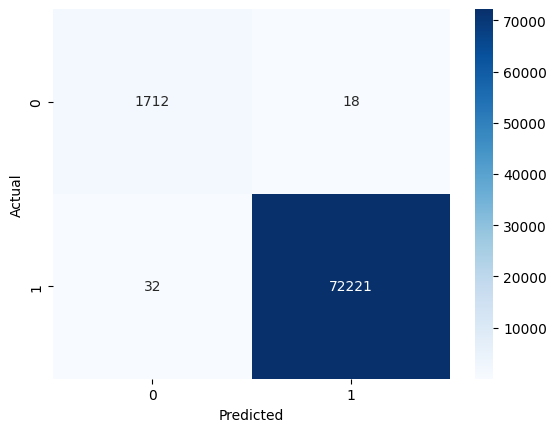

In [574]:
# Plot a confusion matrix
conf_matrix = confusion_matrix(test_Y, pred_Y_lr)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


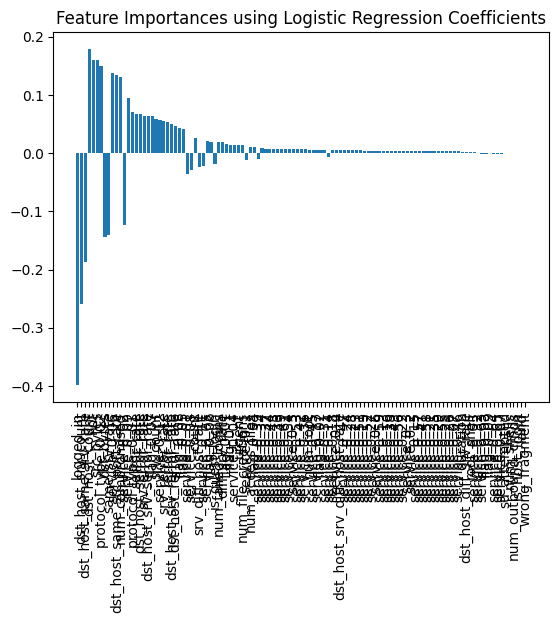

In [575]:
import numpy as np

# For Logistic Regression, use the coefficients
coefficients = lr_model.coef_[0]
indices = np.argsort(np.abs(coefficients))[::-1]

plt.figure()
plt.title("Feature Importances using Logistic Regression Coefficients")
plt.bar(range(len(indices)), coefficients[indices], align="center")
plt.xticks(range(len(indices)), feature_columns[indices], rotation=90)
plt.show()


**Integration with SDN Controller**
Integrate the trained model with the SDN controller. This involves deploying the model as a service that the SDN controller can query for real-time anomaly detection and traffic prediction.


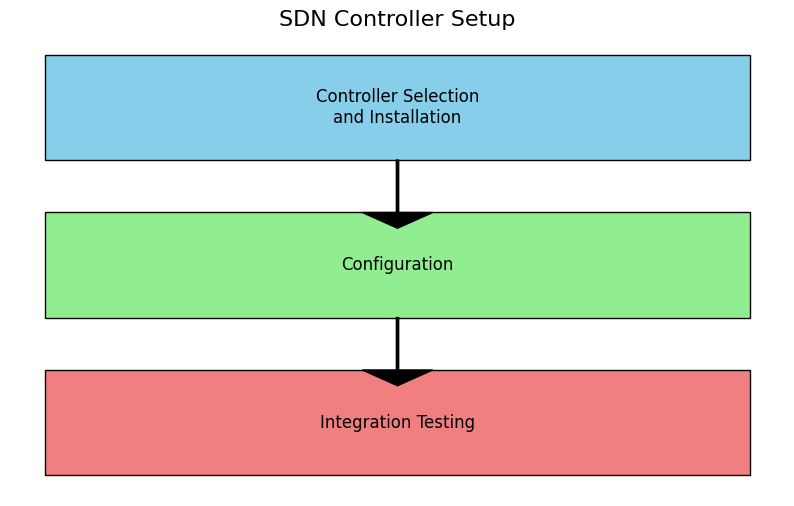

In [576]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Create a new figure
fig, ax = plt.subplots(figsize=(10, 6))

# Draw the rectangles and add text for each step
rects = []
rects.append(patches.Rectangle((0.1, 0.7), 0.3, 0.2, edgecolor='black', facecolor='skyblue'))
rects.append(patches.Rectangle((0.1, 0.4), 0.3, 0.2, edgecolor='black', facecolor='lightgreen'))
rects.append(patches.Rectangle((0.1, 0.1), 0.3, 0.2, edgecolor='black', facecolor='lightcoral'))

for rect in rects:
    ax.add_patch(rect)

# Add arrows to connect the steps
ax.arrow(0.25, 0.7, 0, -0.1, head_width=0.03, head_length=0.03, fc='black', ec='black')
ax.arrow(0.25, 0.4, 0, -0.1, head_width=0.03, head_length=0.03, fc='black', ec='black')

# Add text inside the rectangles
ax.text(0.25, 0.8, 'Controller Selection\nand Installation', horizontalalignment='center', verticalalignment='center', fontsize=12)
ax.text(0.25, 0.5, 'Configuration', horizontalalignment='center', verticalalignment='center', fontsize=12)
ax.text(0.25, 0.2, 'Integration Testing', horizontalalignment='center', verticalalignment='center', fontsize=12)

# Add labels and title
ax.set_title('SDN Controller Setup', fontsize=16)
ax.axis('off')

plt.show()


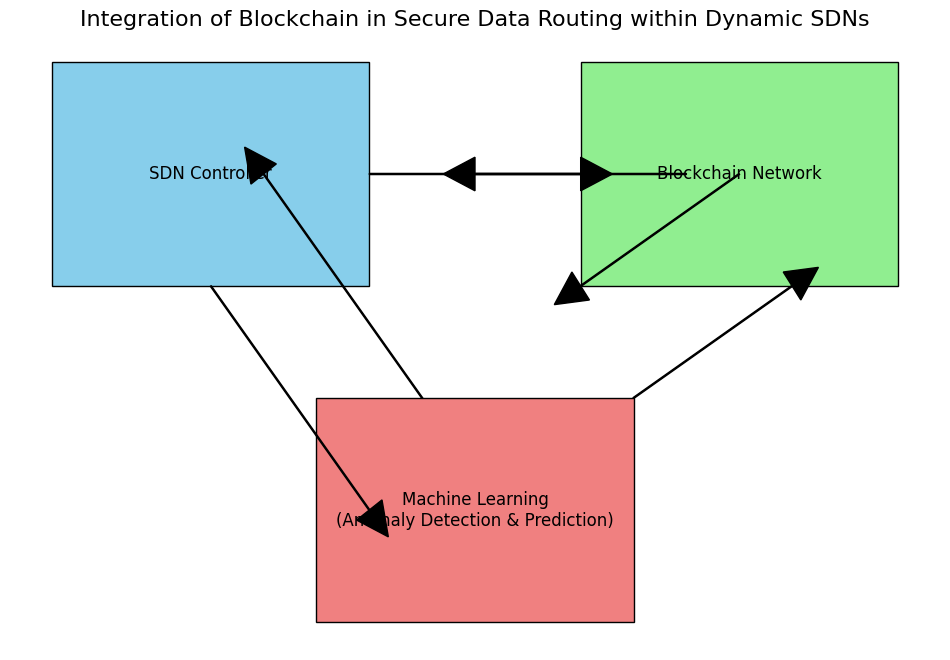

In [577]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Create a new figure
fig, ax = plt.subplots(figsize=(12, 8))

# Draw the rectangles for each component
rects = []
rects.append(patches.Rectangle((0.1, 0.6), 0.3, 0.2, edgecolor='black', facecolor='skyblue'))  # SDN Controller
rects.append(patches.Rectangle((0.6, 0.6), 0.3, 0.2, edgecolor='black', facecolor='lightgreen'))  # Blockchain Network
rects.append(patches.Rectangle((0.35, 0.3), 0.3, 0.2, edgecolor='black', facecolor='lightcoral'))  # Machine Learning

for rect in rects:
    ax.add_patch(rect)

# Add arrows to show interactions
ax.arrow(0.4, 0.7, 0.2, 0, head_width=0.03, head_length=0.03, fc='black', ec='black')  # SDN to Blockchain
ax.arrow(0.7, 0.7, -0.2, 0, head_width=0.03, head_length=0.03, fc='black', ec='black')  # Blockchain to SDN
ax.arrow(0.25, 0.6, 0.15, -0.2, head_width=0.03, head_length=0.03, fc='black', ec='black')  # SDN to ML
ax.arrow(0.45, 0.5, -0.15, 0.2, head_width=0.03, head_length=0.03, fc='black', ec='black')  # ML to SDN
ax.arrow(0.65, 0.5, 0.15, 0.1, head_width=0.03, head_length=0.03, fc='black', ec='black')  # ML to Blockchain
ax.arrow(0.75, 0.7, -0.15, -0.1, head_width=0.03, head_length=0.03, fc='black', ec='black')  # Blockchain to ML

# Add text inside the rectangles
ax.text(0.25, 0.7, 'SDN Controller', horizontalalignment='center', verticalalignment='center', fontsize=12)
ax.text(0.75, 0.7, 'Blockchain Network', horizontalalignment='center', verticalalignment='center', fontsize=12)
ax.text(0.5, 0.4, 'Machine Learning\n(Anomaly Detection & Prediction)', horizontalalignment='center', verticalalignment='center', fontsize=12)

# Add labels and title
ax.set_title('Integration of Blockchain in Secure Data Routing within Dynamic SDNs', fontsize=16)
ax.axis('off')

plt.show()


# **Blockchain Implementation**

In [579]:
import hashlib
import json
from time import time
from uuid import uuid4

class Blockchain:
    def __init__(self):
        self.chain = []
        self.current_transactions = []

        # Create the genesis block
        self.new_block(previous_hash='1', proof=100)

    def new_block(self, proof, previous_hash=None):
        block = {
            'index': len(self.chain) + 1,
            'timestamp': time(),
            'transactions': self.current_transactions,
            'proof': proof,
            'previous_hash': previous_hash or self.hash(self.chain[-1]),
        }
        self.current_transactions = []
        self.chain.append(block)
        return block

    def new_transaction(self, sender, recipient, amount):
        self.current_transactions.append({
            'sender': sender,
            'recipient': recipient,
            'amount': amount,
        })
        return self.last_block['index'] + 1

    @staticmethod
    def hash(block):
        block_string = json.dumps(block, sort_keys=True).encode()
        return hashlib.sha256(block_string).hexdigest()

    @property
    def last_block(self):
        return self.chain[-1]

    def proof_of_work(self, last_proof):
        proof = 0
        while self.valid_proof(last_proof, proof) is False:
            proof += 1
        return proof

    @staticmethod
    def valid_proof(last_proof, proof):
        guess = f'{last_proof}{proof}'.encode()
        guess_hash = hashlib.sha256(guess).hexdigest()
        return guess_hash[:4] == "0000"

blockchain = Blockchain()


# **Integrating Blockchain with ML Predictions**

In [589]:
import hashlib
import json
from time import time
import random

class Blockchain:
    def __init__(self):
        self.chain = []
        self.current_transactions = []
        self.new_block(previous_hash='1', proof=100)

    def new_block(self, proof, previous_hash=None):
        block = {
            'index': len(self.chain) + 1,
            'timestamp': time(),
            'transactions': self.current_transactions,
            'proof': proof,
            'previous_hash': previous_hash or self.hash(self.chain[-1]),
        }
        self.current_transactions = []
        self.chain.append(block)
        return block

    def new_transaction(self, sender, recipient, amount):
        self.current_transactions.append({
            'sender': sender,
            'recipient': recipient,
            'amount': amount,
        })
        return self.last_block['index'] + 1

    @staticmethod
    def hash(block):
        block_string = json.dumps(block, sort_keys=True).encode()
        return hashlib.sha256(block_string).hexdigest()

    @property
    def last_block(self):
        return self.chain[-1]

    def proof_of_work(self, last_proof):
        proof = 0
        while self.valid_proof(last_proof, proof) is False:
            proof += 1
        return proof

    @staticmethod
    def valid_proof(last_proof, proof):
        guess = f'{last_proof}{proof}'.encode()
        guess_hash = hashlib.sha256(guess).hexdigest()
        return guess_hash[:4] == "0000"

# Initialize the blockchain
blockchain = Blockchain()

# Optimized function to add transactions to the blockchain based on ML predictions
def add_transactions_to_blockchain(predictions):
    batch_size = 10  # Adjust batch size as needed
    for i in range(0, len(predictions), batch_size):
        for j in range(batch_size):
            if i + j < len(predictions):
                pred = predictions[i + j]
                transaction = {
                    'sender': 'node_1',
                    'recipient': 'node_2' if pred == 1 else 'node_3',
                    'amount': random.randint(1, 10),
                }
                blockchain.new_transaction(**transaction)
        last_block = blockchain.last_block
        proof = blockchain.proof_of_work(last_block['proof'])
        previous_hash = blockchain.hash(last_block)
        blockchain.new_block(proof, previous_hash)

# Add transactions based on model predictions
add_transactions_to_blockchain(pred_Y_lr)

# Print the blockchain
for block in blockchain.chain:
    print(json.dumps(block, indent=4))


KeyboardInterrupt: 

# ** Visualizing the Blockchain**

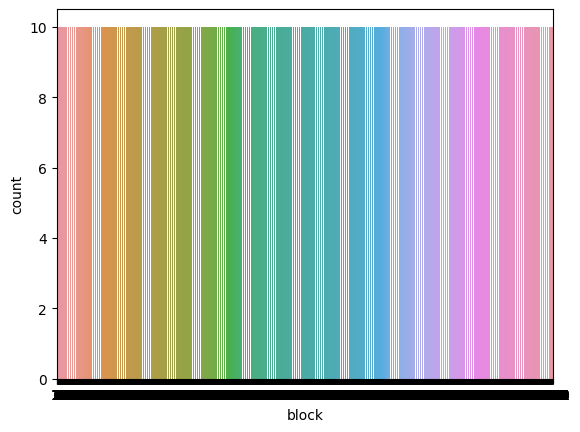

In [591]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to visualize the blockchain
def visualize_blockchain(blockchain):
    chain_data = []
    for block in blockchain.chain:
        for transaction in block['transactions']:
            chain_data.append({
                'block': block['index'],
                'sender': transaction['sender'],
                'recipient': transaction['recipient'],
                'amount': transaction['amount'],
            })
    df = pd.DataFrame(chain_data)
    sns.countplot(x='block', data=df)
    plt.show()

visualize_blockchain(blockchain)


#  Integration with SDN Controller

In [582]:
!pip install Flask


In [586]:
from flask import Flask, request, jsonify
import joblib
import pandas as pd

# Initialize Flask app
app = Flask(__name__)

# Load the trained logistic regression model
lr_model = joblib.load('lr_model.pkl')

# Dummy blockchain implementation
blockchain = Blockchain()

# Function to add transactions to the blockchain based on predictions
def add_transactions_to_blockchain(predictions, test_data):
    for i, pred in enumerate(predictions):
        transaction = {
            'sender': 'node_1',
            'recipient': 'node_2' if pred == 1 else 'node_3',
            'amount': np.random.randint(1, 10),
        }
        blockchain.new_transaction(**transaction)
        if i % 5 == 0:
            last_block = blockchain.last_block
            proof = blockchain.proof_of_work(last_block['proof'])
            previous_hash = blockchain.hash(last_block)
            blockchain.new_block(proof, previous_hash)

# Endpoint for making predictions
@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json()
    df = pd.DataFrame(data)
    prediction = lr_model.predict(df)
    
    # Add predictions to blockchain
    add_transactions_to_blockchain(prediction, df)
    
    return jsonify(prediction.tolist())

# Endpoint for getting the blockchain
@app.route('/blockchain', methods=['GET'])
def get_blockchain():
    return jsonify(blockchain.chain)

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/opt/conda/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/opt/conda/lib/python3.10/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/opt/conda/lib/python3.10/site-packages/traitlets/config/application.py", line 1042, in launch_instance
    app.initialize(argv)
  File "/opt/conda/lib/python3.10/site-packages/traitlets/config/application.py", line 113, in inner
    return method(app, *args, **kwargs)
  File "/opt/conda/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 689, in initialize
    self.init_sockets()
  File "/opt/conda/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 328, in init_sockets
    self.shell_port = self._bind_socket(self.shell_socket, self.shell_port)
  File "/opt/conda/lib/python3.10/site-packages/

SystemExit: 1

In [587]:
!pip install requests


In [ ]:
import requests
import json

# Sample test data
test_data = pd.DataFrame({
    'duration': [0, 0],
    'src_bytes': [491, 146],
    'dst_bytes': [0, 0],
    'wrong_fragment': [0, 0],
    'urgent': [0, 0],
    'hot': [0, 0],
    'num_failed_logins': [0, 0],
    'num_compromised': [0, 0],
    'num_root': [0, 0],
    'num_file_creations': [0, 0],
    'flag_0_01': [1, 1],
    # ... other feature columns
})

# Convert to JSON
test_data_json = test_data.to_json(orient='records')

# Send POST request to the /predict endpoint
response = requests.post('http://127.0.0.1:5000/predict', data=test_data_json, headers={'Content-Type': 'application/json'})

# Print predictions
print(response.json())

# Get the current state of the blockchain
response = requests.get('http://127.0.0.1:5000/blockchain')
print(json.dumps(response.json(), indent=4))
